In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure/heart_failure.csv


# **Importing Libraries and Datasets**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset= pd.read_csv('/kaggle/input/heart-failure/heart_failure.csv')
dataset.head(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   
6                    0  127000.00               1.2           137    1   
7                    0  454000.00               1.1           131    1   
8                    0  263358.03               1.5           138    0   
9                    1  388000.00               9.4           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

Seperating the output column



In [4]:

y=dataset.iloc[:,-1]
x=dataset.iloc[:,:]
x.drop(["DEATH_EVENT"], axis = 1, inplace = True)
x.head(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   
6                    0  127000.00               1.2           137    1   
7                    0  454000.00               1.1           131    1   
8                    0  263358.03               1.5           138    0   
9                    1  388000.00               9.4           133    1   

   smoking  time  
0        0     4  
1        0     6  
2        1     7  
3        0     7  
4        0     8  
5        1     8  
6        0    10  
7        1    10  
8        0    10  
9        1    10

In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

# **Data Exploration**

In [6]:
x.shape

(299, 12)

In [7]:
x.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
dtype: int64

In [8]:
x.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  
count         299.00000    299.000000  299.000000  299.00000  299.000000  
mean            1.39388    136.625418    0.648829    0.32107  130.260870  
std             1.03451      4.412477    0.478136    0.46767   77.614208  
min             0.50000    113.000000    0.000000    0.00000    4.000000  
25%             0.90000    134.000000    0.000000    0.00000   73.000000  
50%             1.10000    137.000000    1.000000    0.00000  115.000000  
75%             1.40000    140.000000    1.000000    1.00000  203.000000  
max             9.40000    148.000000    1.000000    1.00000  285.000000

There are no missing values from the dataset as seen below

In [9]:
pd.isnull(dataset).values.any()

False

# **Data Preprocessing**

In [10]:
x_columns=x.columns


OneHotEncoding the sex column from m,f to 1,0

In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False ) 
x['sex'] = ohe.fit_transform(x['sex'].values.reshape(-1, 1))

Breaking x and y randomly into train and test sets in a 80,20 ratio

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=1)

Normalising x test and x train using Standard Scaler

In [13]:

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train_n = sc_x.fit_transform(x_train)
x_test_n = sc_x.fit_transform(x_test)

# **Data Mining**
 
We have used Classification and Lime:

We need to predict if a particular heart failure patient will survive within the checkup period. Thus based on the input information you need to predict if the person servives or not. There are two different outputs options 1 for dies and o for survives. Thus we use classification algorithm to predict the reuslt. The two classes being 1 for dies and 0 for survives.

After building the classification algorithm we use lime algorithm to find the features that contribute most to the result so we can find the most relevent features for the output. And we can find the features that have the least relevance

# **Logistic Regression**

We use logistic regression to perform classification. The accuracy is 0.82 , 0.87

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_n, y_train)

prediction = logreg.predict(x_test)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(x_train_n, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(x_test_n, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.87


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# **Decision Tree Classifier**

We use decision tree classifier to perform classification. The accuracy is 1, 0.77

In [15]:
from sklearn.tree import DecisionTreeClassifier
regressor_dtr = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(regressor_dtr.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(regressor_dtr.score(x_test, y_test)))
prediction=regressor_dtr.predict(x_test)

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.80


We plot the decision tree

# **Gaussian Naive Bayes**

We use Gaussian Naive Bayes to perform classification. The accuracy is 0.76,0.82

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_n, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(x_train_n, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(x_test_n, y_test)))
prediction=gnb.predict(x_test)

Accuracy of GNB classifier on training set: 0.76
Accuracy of GNB classifier on test set: 0.82


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# **Support Vector Machine**

We use Support Vector Machine to perform classification. The accuracy is 0.89,0.85

In [17]:

from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_n, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(x_train_n, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(x_test_n, y_test)))
prediction=svm.predict(x_test)

Accuracy of SVM classifier on training set: 0.89
Accuracy of SVM classifier on test set: 0.85


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = regressor_dtr.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[37  9]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        46
           1       0.55      0.79      0.65        14

    accuracy                           0.80        60
   macro avg       0.74      0.80      0.75        60
weighted avg       0.84      0.80      0.81        60



Decision Tree classification is selected, it has the highest accuracy rate for the training set

# **Data Visualization**

The number of people surviving vs death is shown below. It shows that there are many more rows of people surviving than dying

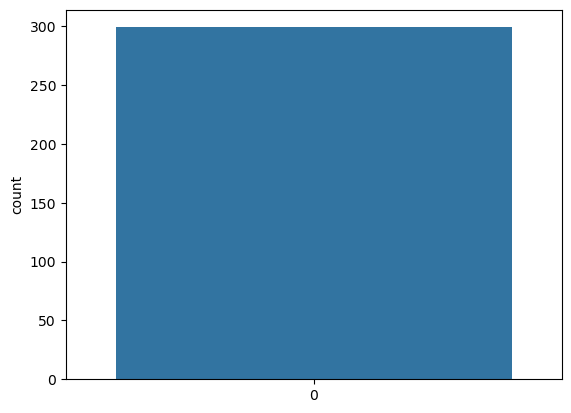

In [19]:
import seaborn as sns
sns.countplot(y,label="Count")
plt.show()

Box plots of all the features are shown below

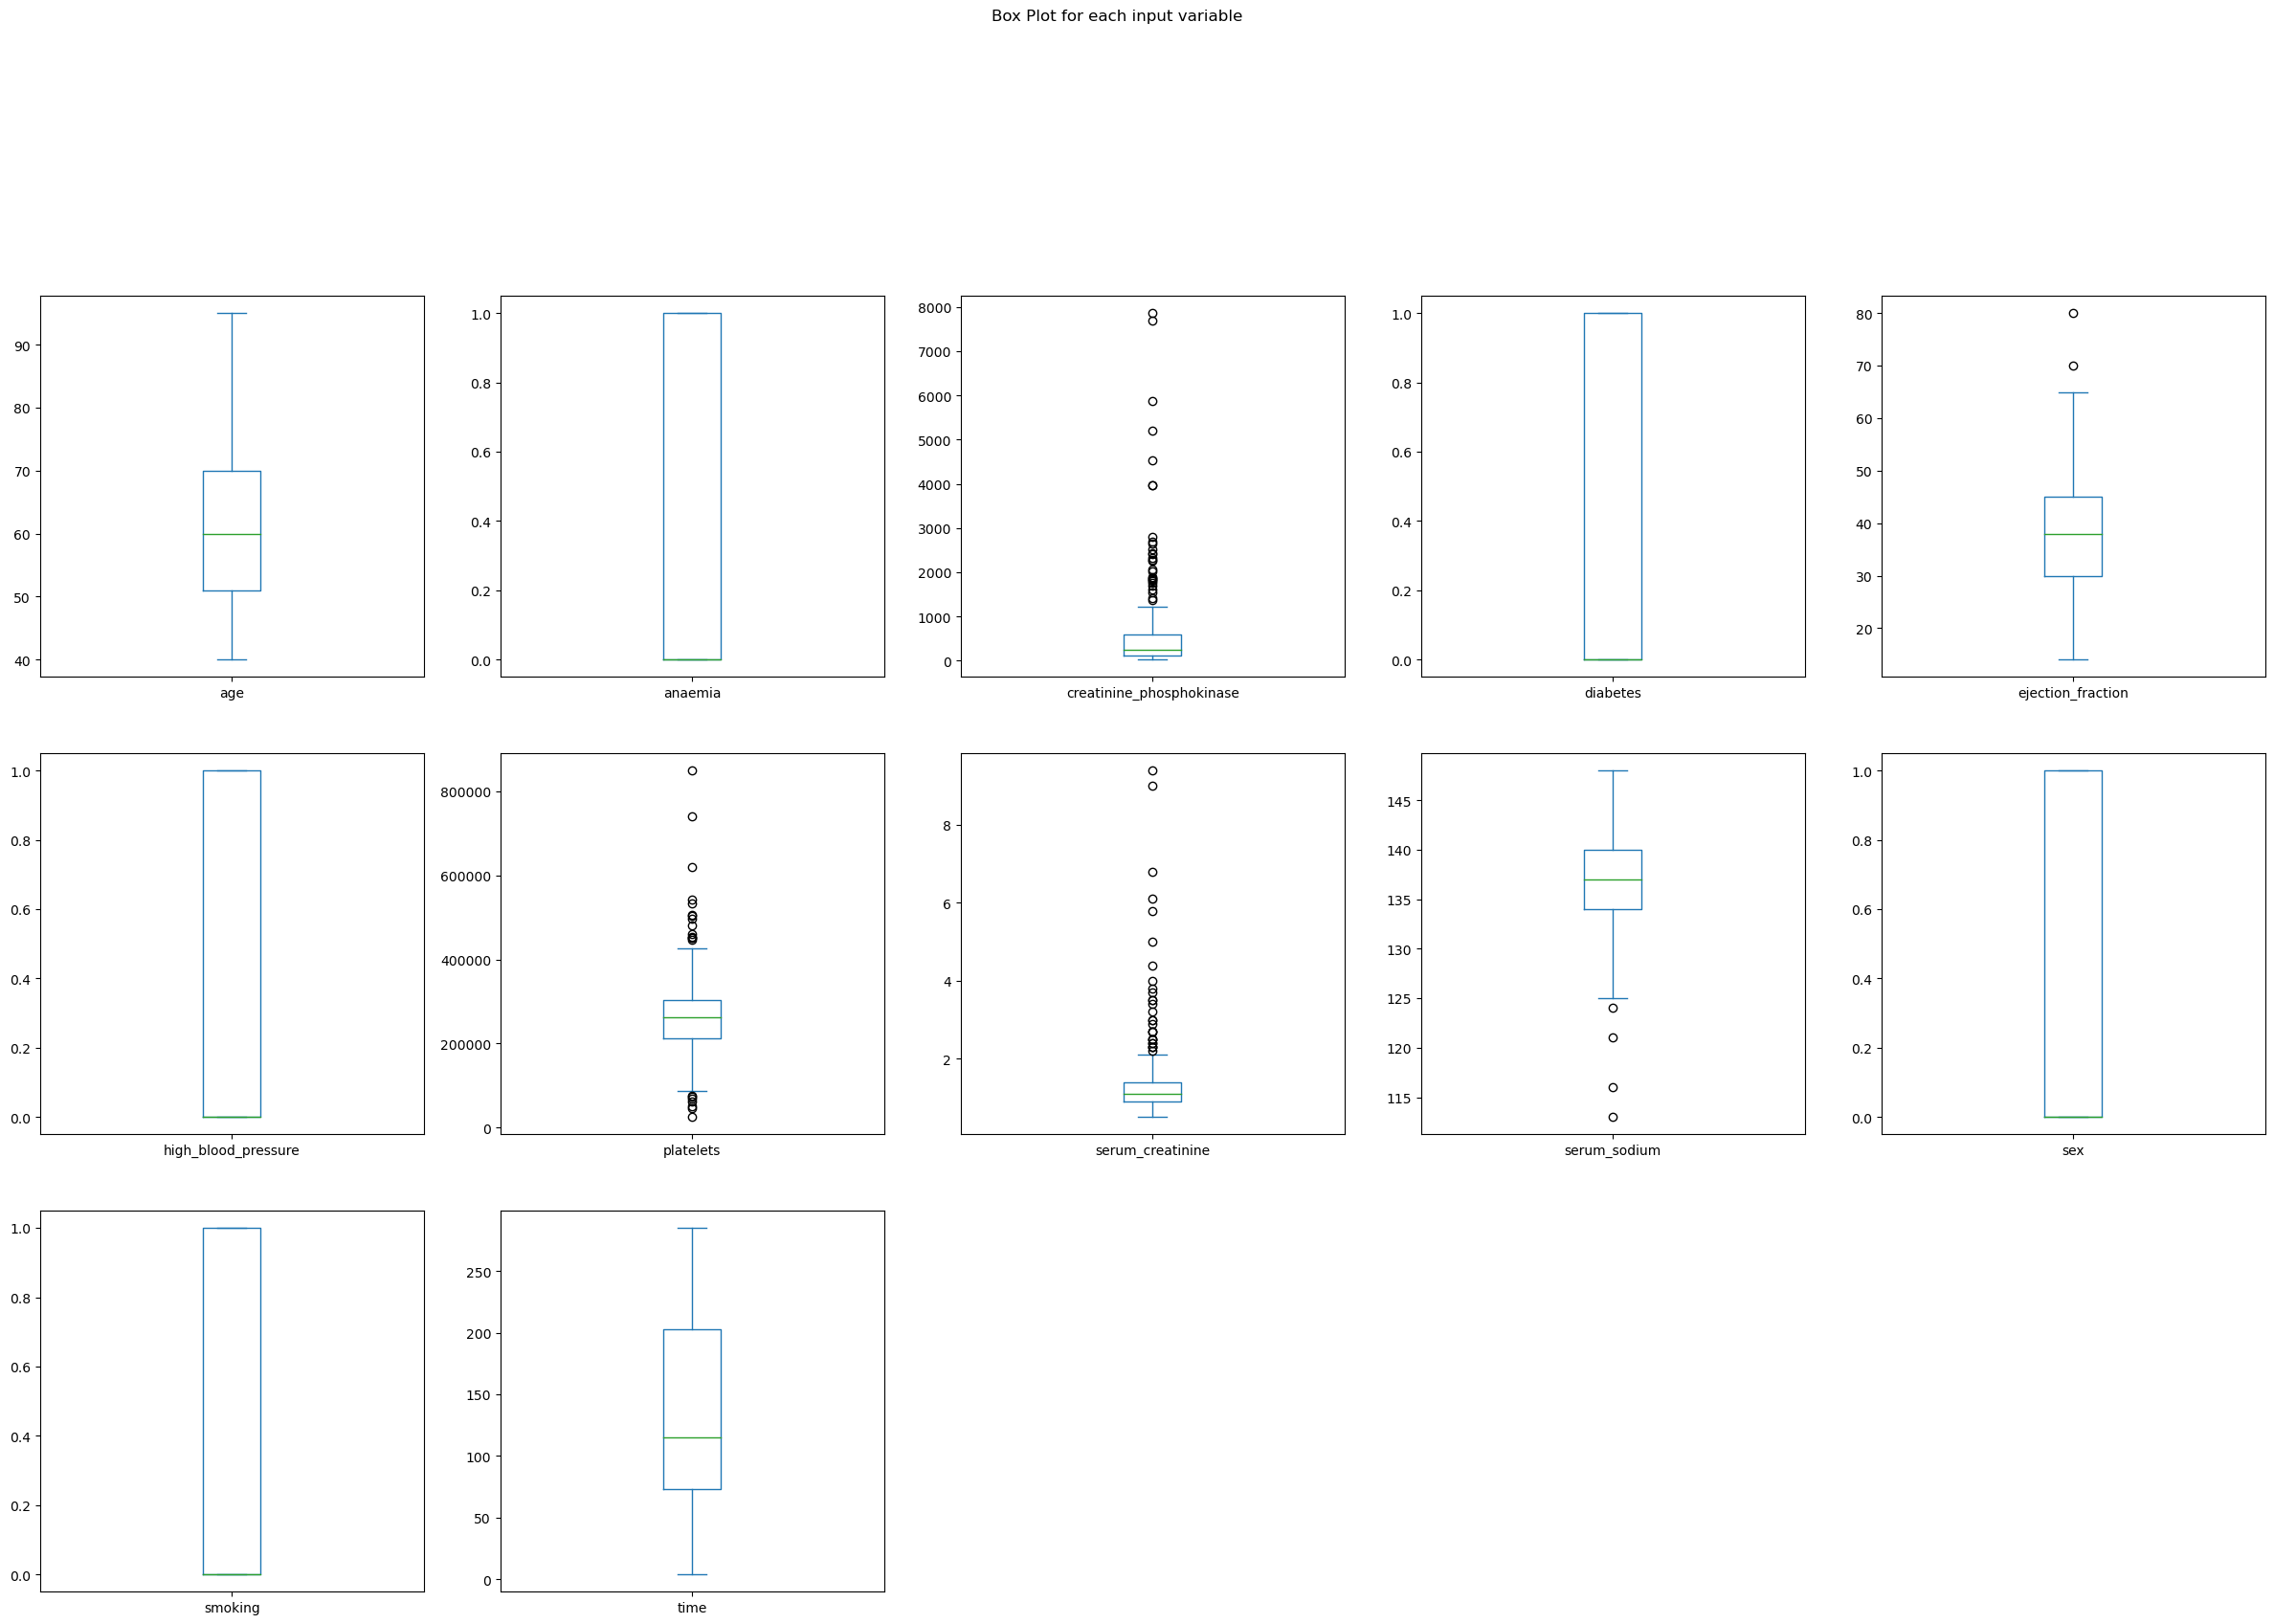

In [20]:
x.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(30,30), 
                                        title='Box Plot for each input variable')
plt.savefig('death_event')
plt.show()

The histograms of all the features is shown below.

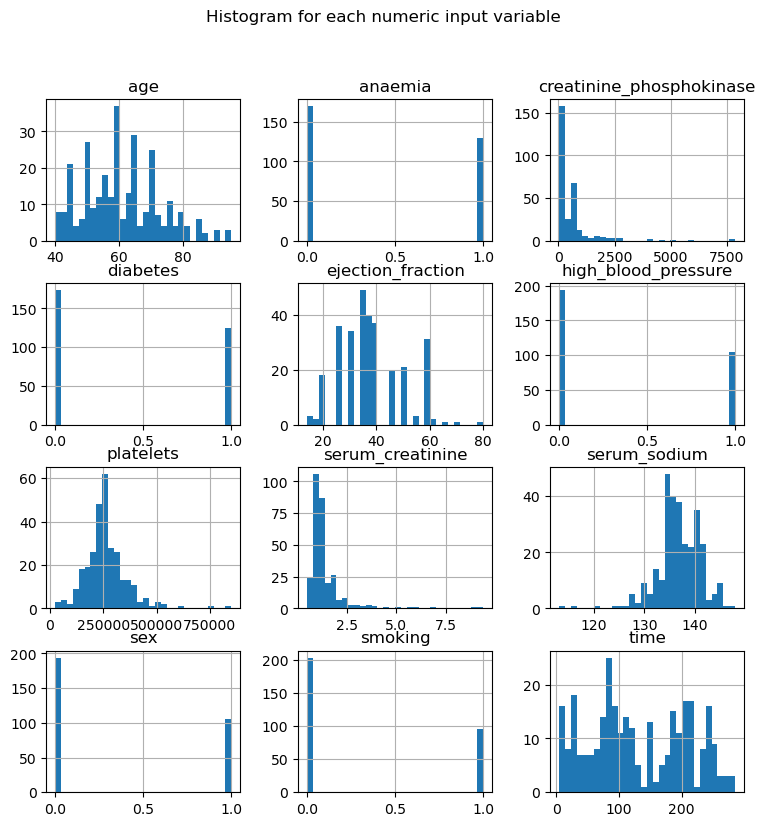

In [21]:
import pylab as pl
x.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('hist')
plt.show()

**The features importance of all the features is shown below. It shows that the feature of most importance is time. After time it is platelets, serum_creatinine and ejection_fraction. The rest of the features have low importance. Specially diabetes, anaemia, smoking, high blood pressure and sex. While all these features must be important in whether a person has heart failure, this graph shows that it does not necessarily contribute to whether the person will survive after the heart failure. features like time, platelets, serum_cretinine and ejection_fraction**

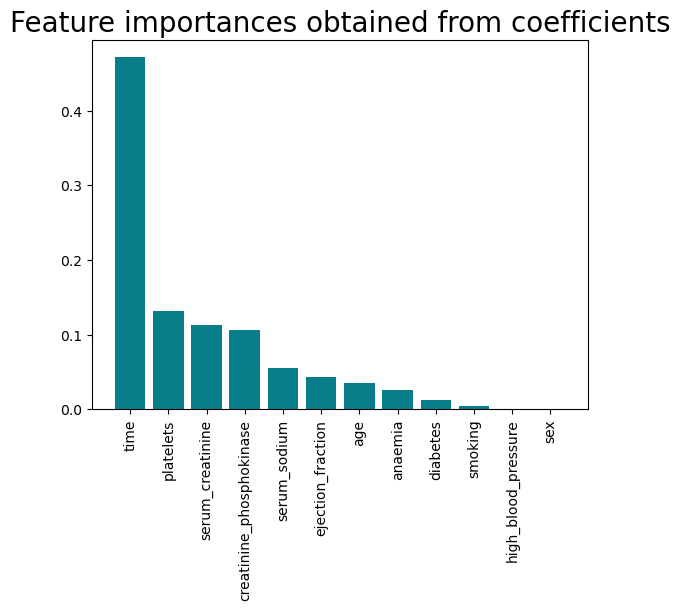

In [22]:

importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': regressor_dtr.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

The diagram bellow uses the correlation matrix to show to what degree two features are related to each other. The colour determines the extent of the relation. The lighter the colour, the greater the relation. It shows us that sex and diabetes is somewhat co-related. So is serum sodium and ejection fraction as well as age and strum_creatinine.

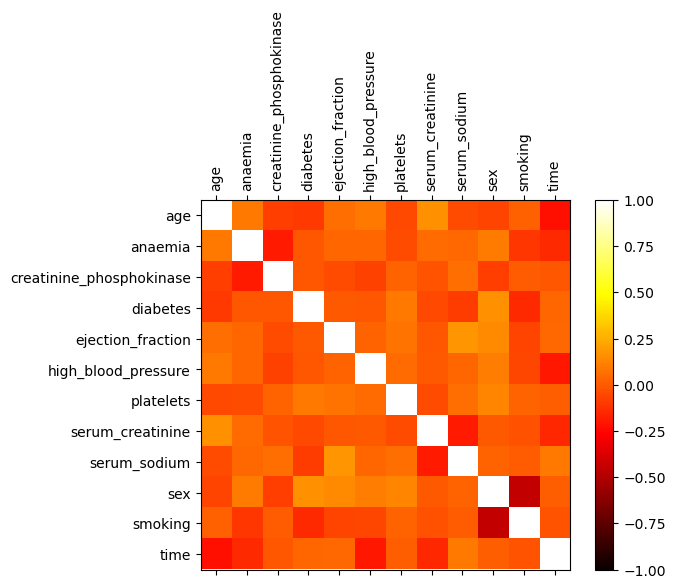

In [23]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

corr = x.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='hot', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(x.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(x.columns)
ax.set_yticklabels(x.columns)
plt.show()

In [24]:
corr


age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                      -0.065430  0.094769                 -0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.101012           0.060098             0.093289   
anaemia                  -0.012729           0.031557             0.038182   
creatinine_phosphokinase -0.009639          -0.044080            -0.070590   
diabetes                  1.000000          -0.004850            -0.012732   
ejection_fraction        -0.004850           1.000000             0.024445   
high_blood_pressure      -0.012732           0.024445             1.000000   
platelets                 0.092193           0.072177             0.049963   
serum_creatinine         -0.046975          -0.011302            -0.004935   
serum_sodium             -0.089551           0.175902             0.037109   
sex                       0.157730           0.148386             0.104615   
smoking                  -0.147173          -0.067315            -0.055711   
time                      0.033726           0.041729            -0.196439   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.052354          0.159187     -0.045966 -0.065430   
anaemia                   -0.043786          0.052174      0.041882  0.094769   
creatinine_phosphokinase   0.024463         -0.016408      0.059550 -0.079791   
diabetes                   0.092193         -0.046975     -0.089551  0.157730   
ejection_fraction          0.072177         -0.011302      0.175902  0.148386   
high_blood_pressure        0.049963         -0.004935      0.037109  0.104615   
platelets                  1.000000         -0.041198      0.062125  0.125120   
serum_creatinine          -0.041198          1.000000     -0.189095 -0.006970   
serum_sodium               0.062125         -0.189095      1.000000  0.027566   
sex                        0.125120         -0.006970      0.027566  1.000000   
smoking                    0.028234         -0.027414      0.004813 -0.445892   
time                       0.010514         -0.149315      0.087640  0.015608   

                           smoking      time  
age                       0.018668 -0.224068  
anaemia                  -0.107290 -0.141414  
creatinine_phosphokinase  0.002421 -0.009346  
diabetes                 -0.147173  0.033726  
ejection_fraction        -0.067315  0.041729  
high_blood_pressure      -0.055711 -0.196439  
platelets                 0.028234  0.010514  
serum_creatinine         -0.027414 -0.149315  
serum_sodium              0.004813  0.087640  
sex                      -0.445892  0.015608  
smoking                   1.000000 -0.022839  
time                     -0.022839  1.000000

Installing LIME

In [25]:
pip install lime


Note: you may need to restart the kernel to use updated packages.


In [26]:
X = np.array(x)

Selecting 4 random rows from x dataset to see if features which were most important in feature importance contribute the most to the respective result.

In [27]:
import lime 
import lime.lime_tabular 
import shap 
number_of_rows = x.shape[0]
random_indices = np.random.choice(number_of_rows, size=4, replace=False)

In [28]:
explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names=x.columns, class_names=[0,1], discretize_continuous=True)

Performing shap and plotting the amount all the features contributed to the result from the 4 randomly chosen rows.

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


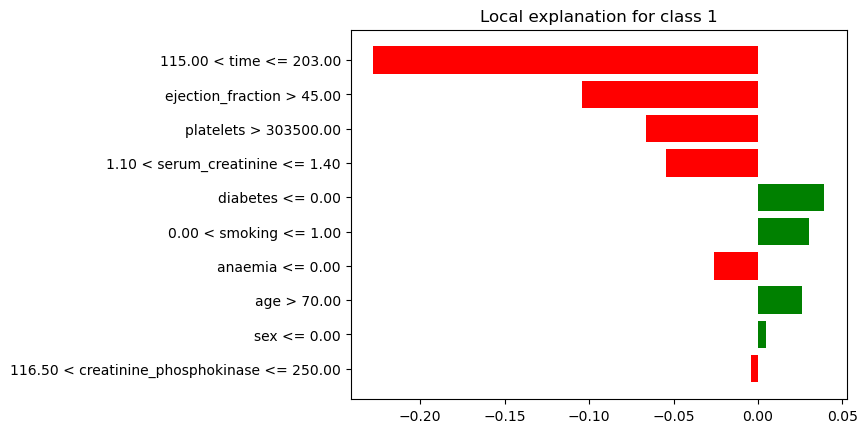

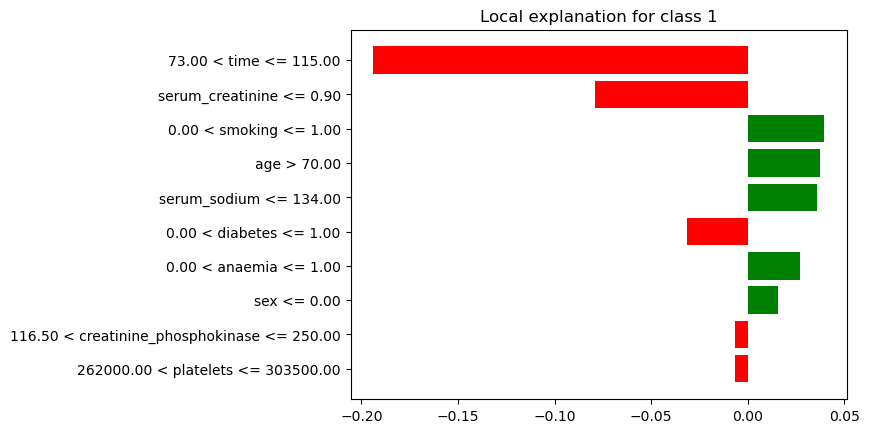

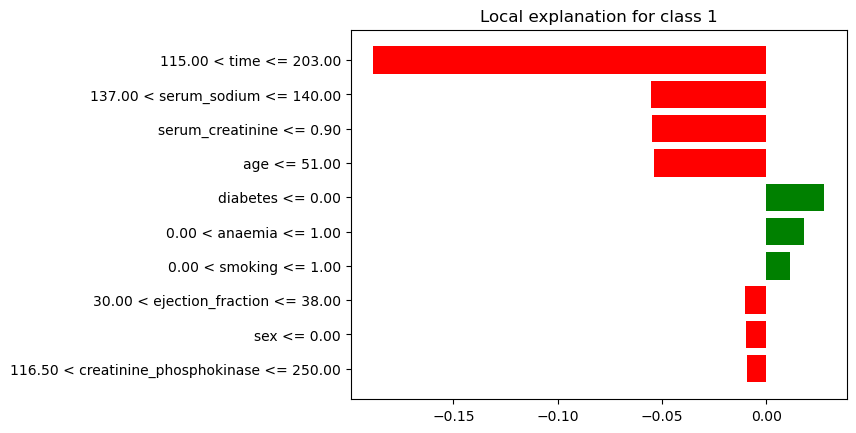

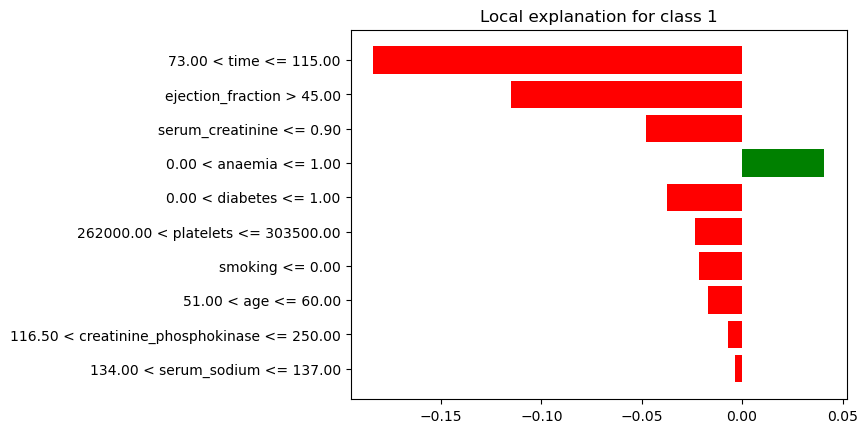

In [29]:
for i in random_indices:
  exp = explainer.explain_instance(X[i], regressor_dtr.predict_proba)
  exp.as_pyplot_figure()
  exp.show_in_notebook(show_table=True, show_all=False)

Interpret the results obtained.

In all 4 results it is observe that time, ejection_fraction and serum_creatinine are the most important factors and contribute most to the respective outputs whether they survive or die.It is also observed that sex, platelets, diabetes , anaemia , high blood pressure and age have minimal contribution to the result of these individual outputs. It is known that blood pressure, age, sex play an important part in heart failure, however they do not determine survial of the patient

As we can see above time, serum creatinine and ejection fraction are the most accurate features.

Provide BI decision that can be taken based on the result obtained.

The chances of survival in the follow-up period are majorly dependant on serum certinine and ejection fraction. Other features such as smoking,sex,anaemia, platelets do matter however we can conclude that survival rate is dependant on the earlier factors. Thus while these factors contribute to heart failure they do not necessarily contribute to the chance of survival after a heart failure. When treating patients of heart failure high risk patients can therefore be identified. Also these criterias should be treated and bettered for a better chance of survial